In [1]:
import networkx as nx
from matplotlib import pyplot as plt
from vrpy import VehicleRoutingProblem

In [2]:
G = nx.DiGraph()
G.add_edge("Source", 1, cost=1)
G.add_edge("Source", 2, cost=2)
G.add_edge(1, "Sink", cost=0)
G.add_edge(2, "Sink", cost=2)
G.add_edge(1, 2, cost=1)
G.add_edge(2, 1, cost=1)

G.nodes[1]["demand"] = 5
G.nodes[2]["demand"] = 4

In [8]:
prob = VehicleRoutingProblem(G, load_capacity=10)
prob.solve()

print(prob.best_value)
print(prob.best_routes)

INFO:vrpy.vrp:new upper bound : max num stops = 4
INFO:vrpy.vrp:Clarke & Wright solution found with value 3 and 1 vehicles
INFO:vrpy.vrp:Greedy solution found with value 4 and 1 vehicles
INFO:vrpy.vrp:iteration 0, 3.0
INFO:vrpy.master_solve_pulp:total cost = 3.0


No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
3
{1: ['Source', 2, 1, 'Sink']}


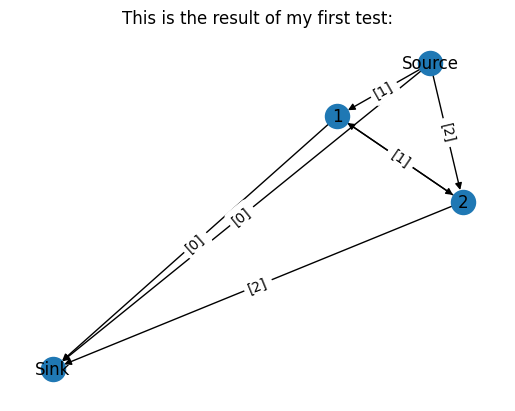

In [10]:
pos = nx.spring_layout(G)
edge_labels = dict([((n1, n2), f'{G.edges[n1, n2]["cost"]}')
                     for n1, n2 in G.edges])
fig, ax = plt.subplots()
ax.set_title("This is the result of my first test:")
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(
       G, pos, 
       edge_labels=edge_labels
)
plt.box(False)
plt.show()